# Problem Statement

Design a fuzzy controller for a train approaching or leaving a station.
The input variables are:
*   Distance from the station
*   Speed of the train



The output is the brake power to be used.

Use the following specifications:
a) Triangular membership functions
b) Four descriptors for each variable
c) Five to six rules for control
d) Approximate defuzzification method

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.3 MB/s eta 0:00:00


##Solution

**Defining Input and Output Variables**

In [ ]:

distance = ctrl.Antecedent(np.arange(0, 501, 1), 'distance')  # meters
speed = ctrl.Antecedent(np.arange(0, 61, 1), 'speed')          # km/hr
brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')         # brake power %


**Define Triangular Membership Functions**

In [ ]:
distance['VSD'] = fuzz.trimf(distance.universe, [0, 0, 100])
distance['SD']  = fuzz.trimf(distance.universe, [0, 100, 400])
distance['LD']  = fuzz.trimf(distance.universe, [100, 400, 500])
distance['VLD'] = fuzz.trimf(distance.universe, [400, 500, 500])

speed['VLS'] = fuzz.trimf(speed.universe, [0, 0, 10])
speed['LS']  = fuzz.trimf(speed.universe, [0, 10, 50])
speed['HS']  = fuzz.trimf(speed.universe, [10, 50, 60])
speed['VHS'] = fuzz.trimf(speed.universe, [50, 60, 60])

brake['VLP'] = fuzz.trimf(brake.universe, [0, 0, 20])
brake['LP']  = fuzz.trimf(brake.universe, [0, 20, 80])
brake['HP']  = fuzz.trimf(brake.universe, [20, 80, 100])
brake['VHP'] = fuzz.trimf(brake.universe, [80, 100, 100])


**Define Fuzzy Rule Base**

In [ ]:
rule1  = ctrl.Rule(speed['VLS'] & distance['VSD'], brake['HP'])
rule2  = ctrl.Rule(speed['VLS'] & distance['SD'],  brake['LP'])
rule3  = ctrl.Rule(speed['VLS'] & distance['LD'],  brake['VLP'])
rule4  = ctrl.Rule(speed['VLS'] & distance['VLD'], brake['VLP'])

rule5  = ctrl.Rule(speed['LS']  & distance['VSD'], brake['HP'])
rule6  = ctrl.Rule(speed['LS']  & distance['SD'],  brake['LP'])
rule7  = ctrl.Rule(speed['LS']  & distance['LD'],  brake['VLP'])
rule8  = ctrl.Rule(speed['LS']  & distance['VLD'], brake['VLP'])

rule9  = ctrl.Rule(speed['HS']  & distance['VSD'], brake['VHP'])
rule10 = ctrl.Rule(speed['HS']  & distance['SD'],  brake['HP'])
rule11 = ctrl.Rule(speed['HS']  & distance['LD'],  brake['LP'])
rule12 = ctrl.Rule(speed['HS']  & distance['VLD'], brake['LP'])

rule13 = ctrl.Rule(speed['VHS'] & distance['VSD'], brake['VHP'])
rule14 = ctrl.Rule(speed['VHS'] & distance['SD'],  brake['VHP'])
rule15 = ctrl.Rule(speed['VHS'] & distance['LD'],  brake['HP'])
rule16 = ctrl.Rule(speed['VHS'] & distance['VLD'], brake['LP'])


**Build and Simulate Fuzzy Control System**

In [ ]:
# Combine all rules
brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,
                                 rule5, rule6, rule7, rule8,
                                 rule9, rule10, rule11, rule12,
                                 rule13, rule14, rule15, rule16])

brake_sim = ctrl.ControlSystemSimulation(brake_ctrl)




# Simulating for Sample Input

Recommended Brake Power: 43.95%


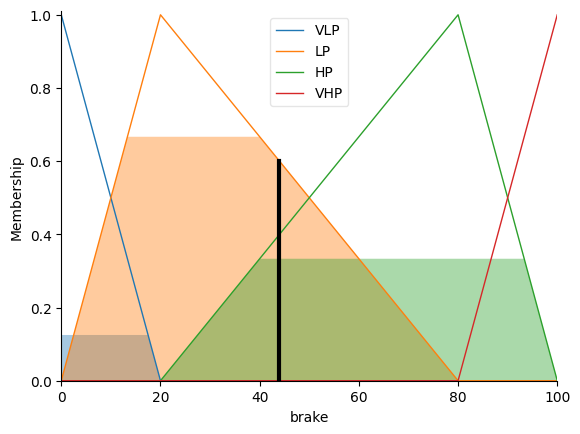

In [ ]:
# Example: Train at 300 m away, 45 km/hr speed
brake_sim.input['distance'] = 300
brake_sim.input['speed'] = 45

brake_sim.compute()

print("Recommended Brake Power: {:.2f}%".format(brake_sim.output['brake']))

# Visualize the output
brake.view(sim=brake_sim)


Recommended Brake Power: 66.54%


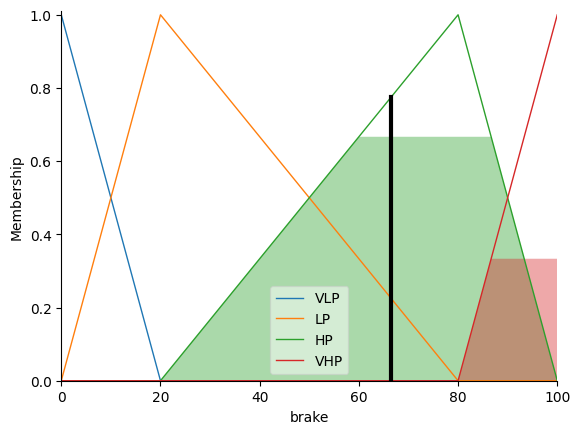

In [ ]:
# Example: Train at 300 m away, 95 km/hr speed
brake_sim.input['distance'] = 300
brake_sim.input['speed'] = 95

brake_sim.compute()

print("Recommended Brake Power: {:.2f}%".format(brake_sim.output['brake']))

# Visualize the output
brake.view(sim=brake_sim)


Recommended Brake Power: 7.78%


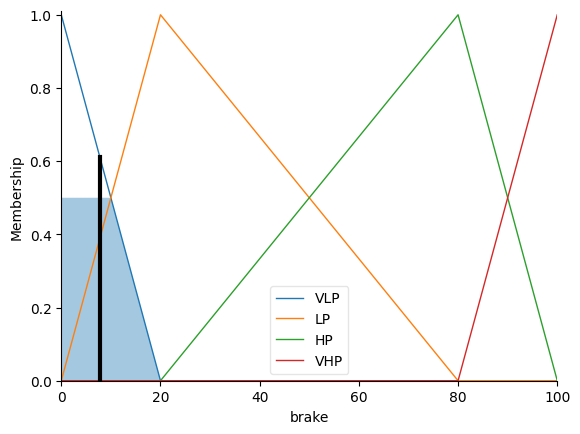

In [ ]:
# Example: Train at 1000 m away, 5 km/hr speed
brake_sim.input['distance'] = 1000
brake_sim.input['speed'] = 5

brake_sim.compute()

print("Recommended Brake Power: {:.2f}%".format(brake_sim.output['brake']))

# Visualize the output
brake.view(sim=brake_sim)


Recommended Brake Power: 93.33%


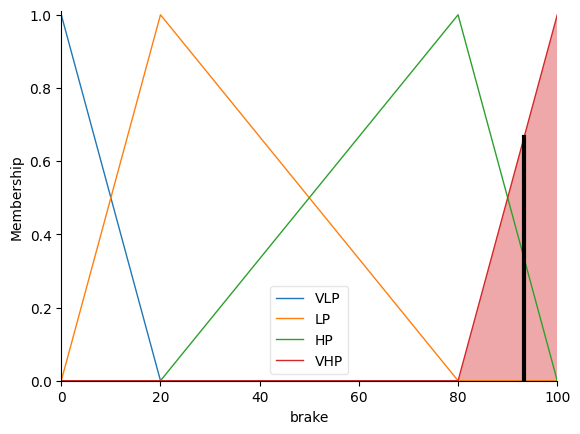

In [ ]:
# Example: Train at 100 m away, 120 km/hr speed
brake_sim.input['distance'] = 100
brake_sim.input['speed'] = 120

brake_sim.compute()

print("Recommended Brake Power: {:.2f}%".format(brake_sim.output['brake']))

# Visualize the output
brake.view(sim=brake_sim)


# Visualisation of Membership Functions

**Distance Membership Function**

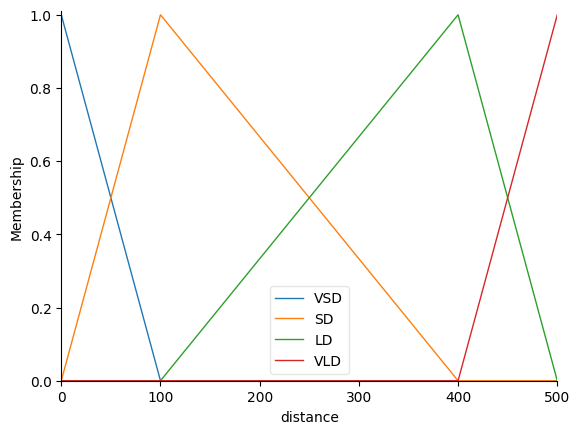

In [ ]:
distance.view()


**Speed Membership Function**

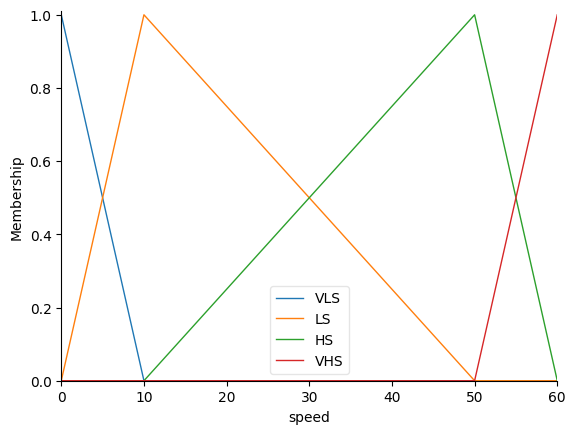

In [ ]:
speed.view()



**Brake Membership Function**

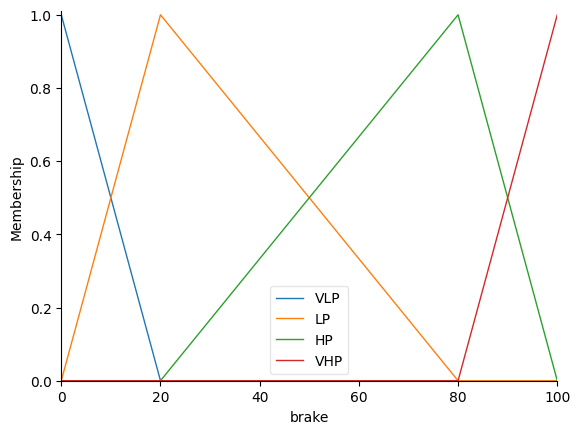

In [ ]:
brake.view()
